In [1]:
%autosave 50

Autosaving every 50 seconds


In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import os
import TradesReporter as tr
import pandas as pd
from IPython.display import HTML
import json
import importlib
pd.set_option('notebook_repr_html',True)
pd.set_option('use_inf_as_na', True)
importlib.reload(tr)
import matplotlib.pyplot as plt


In [3]:
root=os.getcwd()
with open(root + '/cfg.json') as data_file:    
    modelCfg = json.load(data_file)
simpleRun = modelCfg['optConfig']['params'] == None
bs=tr.BacktestResults(filename=root + '/report.db')
mc=tr.MetricsCalculator()


In [4]:
modelProps=dict(line.strip().split('=') for line in open('modelProps.properties')) 
display(tr.displayTitle('Model params'))
display(HTML( pd.DataFrame(pd.Series(modelProps)).to_html()))

,0
period,20


In [5]:
display(bs.makeTickersTab())

['HoldTimeHours']


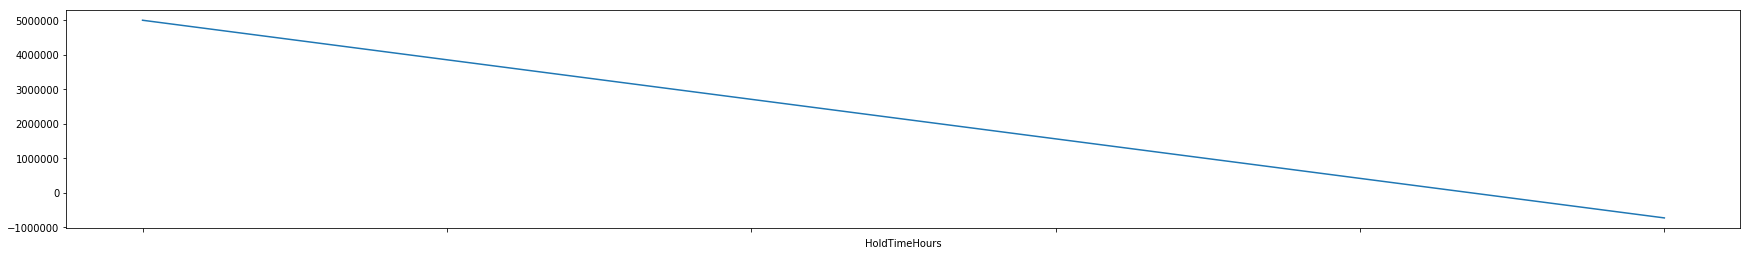

In [6]:
display(tr.displayTitle('Pnl/Factors'))
bs.plotFactors() 

In [7]:
display(tr.displayTitle('Seasonalities'))
display(bs.plotSeasonalities())

In [89]:
from IPython.display import display
from ipywidgets import Checkbox
from IPython.display import clear_output
from ipywidgets import Checkbox, VBox, HBox

optOut=widgets.Output()

def chunks(l, n):
    n = max(1, n)
    return (l[i:i+n] for i in range(0, len(l), n))

ch=[Checkbox(description=i) for i in bs.opts.columns if not i.startswith('opt_') ]

display(HBox(children=list([VBox(children=x) for x in chunks(ch,4)])))

optCols = [i for i in bs.opts.columns if i.startswith('opt_') ]
dfOpt = bs.opts.sort_values(by=optCols[0])                    


def changed(b):    
    with optOut:              
        clear_output(wait=True)
        for me in list([i.description for i in ch if i.value]):                    
            fig = plt.figure(figsize=plt.figaspect(0.3))
            fig.set_size_inches([20, 5])
            X = dfOpt[optCols[0]]
            Y = dfOpt[me]
            plt.plot(X, Y)
            plt.title(me)
        plt.show()
    return optOut

for c in ch:
    c.observe(changed)

display(optOut)



Output()

Output()